### Inspection of baseline feature extraction

#### 1. How to extract features for a specific day

In [1]:
# Standard libraries and path setting
import os
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import parse module
from utils import parse

In [3]:
# Use parse_dtypes to get data for a patient

all_data = parse.parse_dtypes(track=1, patient=1, mode='train', num=1, dtypes=['hrm', 'linacc', 'gyr'])

In [4]:
# Basic inspection
print(type(all_data))
print(all_data.keys())

all_data['hrm'].head(5)      

<class 'dict'>
dict_keys(['hrm', 'linacc', 'gyr'])


,heartRate,rRInterval,time,day_index
0,0,0,0 days 13:16:35.114235,2
1,-3,0,0 days 13:16:35.314217,2
2,-3,0,0 days 13:16:35.513781,2
3,-3,0,0 days 13:16:35.712891,2
4,-3,0,0 days 13:16:35.914296,2


In [5]:
from preprocess.baseline_feature_extraction import extract_day_features
# Get features for day = 2
feat_day2 = extract_day_features(all_data, day_index=2)

In [6]:
feat_day2.head(5)

,DateTime,heartRate_nanmean,rRInterval_nanmean,rRInterval_rmssd,rRInterval_sdnn,rRInterval_lombscargle_power_high,acc_mean,acc_std,acc_delta_mean,acc_delta_std,gyr_mean,gyr_std,gyr_delta_mean,gyr_delta_std,sin_t,cos_t
55,2023-11-17 17:50:00,89.305893,649.120080,53.958095,151.876286,0.017861,0.258835,0.274382,6.729607e-04,0.004045,0.600834,1.611865,-0.001446,0.021796,-0.999048,-0.043619
56,2023-11-17 17:55:00,84.958716,700.663776,65.303456,146.247131,0.121452,0.258976,0.025917,-6.229480e-06,0.000051,0.270967,0.131330,-0.000066,0.000988,-0.999762,-0.021815
59,2023-11-17 18:10:00,82.291667,681.179453,55.659087,168.206694,0.251268,0.434650,0.896892,-1.902549e-04,0.020401,0.677126,1.913633,0.002076,0.023921,-0.999048,0.043619
60,2023-11-17 18:15:00,77.978652,770.969980,37.684305,79.598096,0.001308,0.199294,0.026099,8.171300e-07,0.000121,0.815593,0.635775,-0.000411,0.004365,-0.997859,0.065403
61,2023-11-17 18:20:00,80.490994,745.445630,30.838678,66.919198,0.001766,0.201030,0.032480,3.942857e-05,0.000164,0.887954,0.929490,0.002220,0.007567,-0.996195,0.087156


#### 2. Extracted Features (Definitions)

[1] `DateTime`: Holds the exact time to the corresponding extracted features. Date is irrelevant, is just a convention to convert the dtype to datetime.

[2] `heartRate_nanmean`: The mean heart rate for the corresponding 5Min window (baseline ICASSP).

[3] `rRinterval_nanmean`: The mean RRinterval values in the corresponding 5Min window (baseline ICASSP).


[4] `rRinterval_rmssd`: Same as the baselines of ICASSP.

[5] `rRinterval_sdnn`: Same as the baselines of ICASSP.

[6] `rRinterval_lombscargle_power_high`: Same as the baselines of ICASSP.

[7] `sin_t`: Time encoding from DateTime

[8] `cos_t`: Time encoding from DateTime

[9] `acc_mean`: Mean norm acceleration in 5Min window.

[10] `acc_std`: Std of [9]

[11] `acc_delta_mean`: Deltas of [9] (first aggregated on 30 - sec windows)

[12] `acc_delta_std`: stds of deltas

[13] - [16]: features from gyroscope (same as acc).

#### 3. Visualizing for Relapse and non relapse days

In [7]:
# Find a relapse day for the given patient
relapses = parse.get_relapses(track=1, patient=1, num=1)

relapses.head(5)

,relapse,day_index
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4


In [8]:
# Get all data for track_01/P1/val_1
all_data = parse.parse_dtypes(track=1, patient=1, mode="val", num=1, dtypes=['hrm', 'linacc', 'gyr'])

In [9]:
# extract features for day 2 (relapse day)
feat_relapses = extract_day_features(all_data, day_index=2)

feat_relapses.head(5)

,DateTime,heartRate_nanmean,rRInterval_nanmean,rRInterval_rmssd,rRInterval_sdnn,rRInterval_lombscargle_power_high,acc_mean,acc_std,acc_delta_mean,acc_delta_std,gyr_mean,gyr_std,gyr_delta_mean,gyr_delta_std,sin_t,cos_t
1,2023-11-17 07:55:00,96.566868,725.367578,173.979306,302.478053,0.004731,1.676642,1.917860,-0.000859,0.035581,8.171413,6.113926,-0.012612,0.103503,0.876727,-0.480989
2,2023-11-17 08:00:00,111.537008,652.030687,241.322226,313.581844,0.004080,3.318916,3.175196,0.006139,0.053947,11.552387,6.896275,-0.009669,0.157627,0.866025,-0.500000
3,2023-11-17 08:05:00,107.390785,690.930620,186.684662,300.102567,0.006251,2.285187,2.390734,-0.004269,0.031473,8.928461,6.638982,0.017834,0.117944,0.854912,-0.518773
5,2023-11-17 08:15:00,111.426799,684.141428,214.497312,317.541614,0.002838,1.228050,1.922993,-0.001621,0.013166,6.249054,6.125686,-0.008152,0.081577,0.831470,-0.555570
6,2023-11-17 08:20:00,111.533917,676.519013,196.242216,308.182287,0.003956,1.731377,2.534034,0.002564,0.028169,6.024021,6.352175,0.025651,0.154383,0.819152,-0.573576


##### 3.1 Heart Rate (Relapse vs Non Relapse)

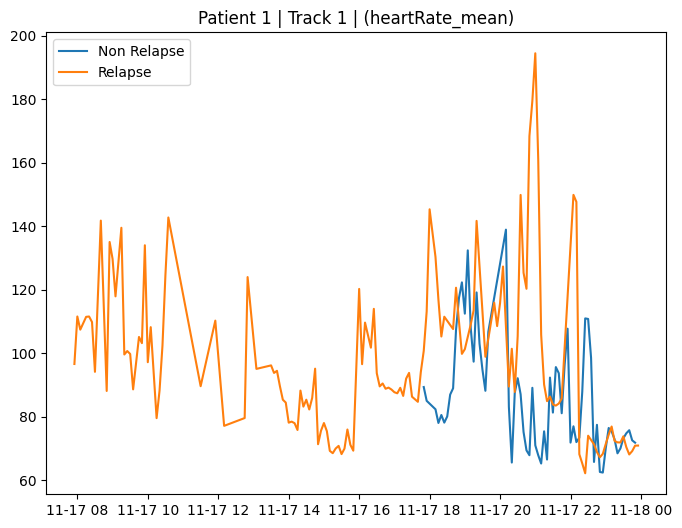

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['heartRate_nanmean'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['heartRate_nanmean'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (heartRate_mean)")

plt.legend()
plt.show()

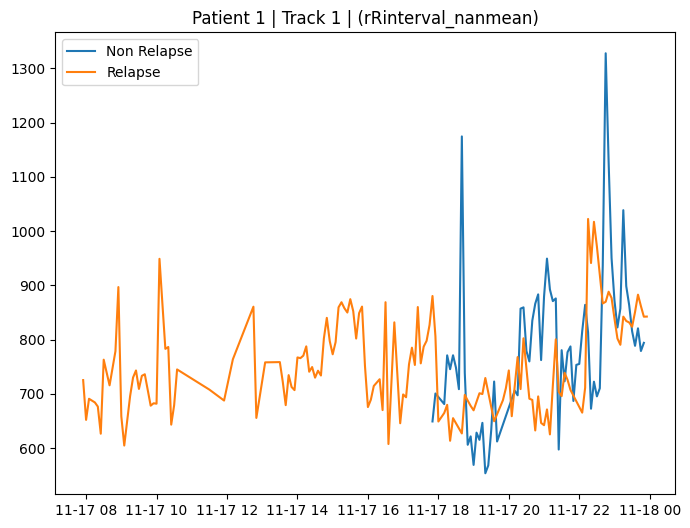

In [11]:
## RR intervals

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['rRInterval_nanmean'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['rRInterval_nanmean'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (rRinterval_nanmean)")

plt.legend()
plt.show()

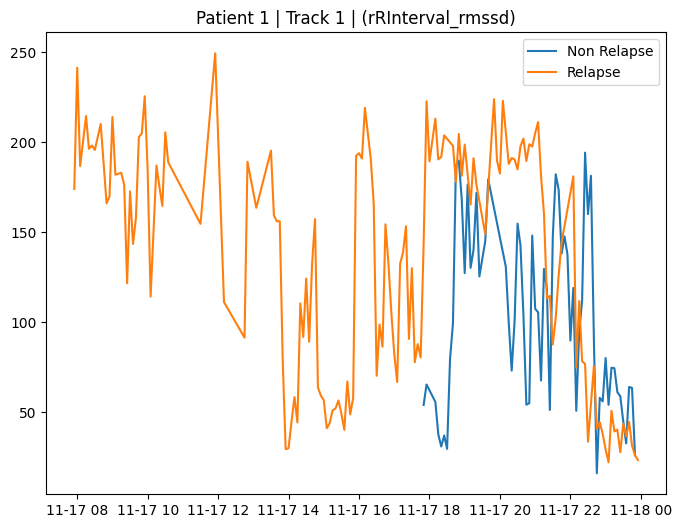

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['rRInterval_rmssd'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['rRInterval_rmssd'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (rRInterval_rmssd)")

plt.legend()
plt.show()

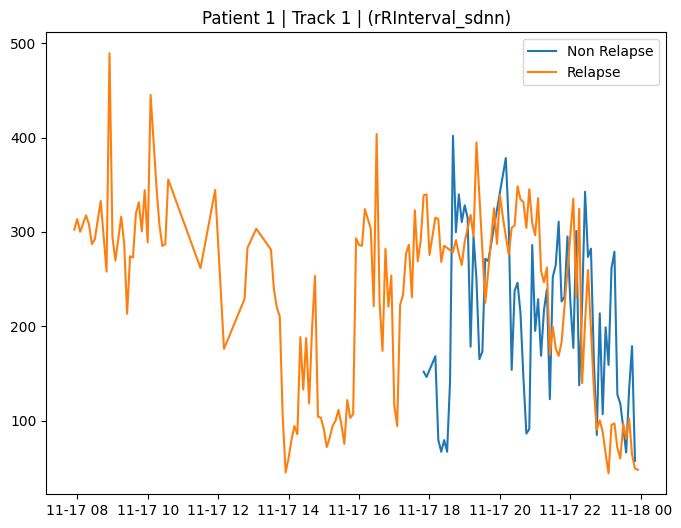

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['rRInterval_sdnn'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['rRInterval_sdnn'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (rRInterval_sdnn)")

plt.legend()
plt.show()

##### 3.2 Acceleration (Linear)

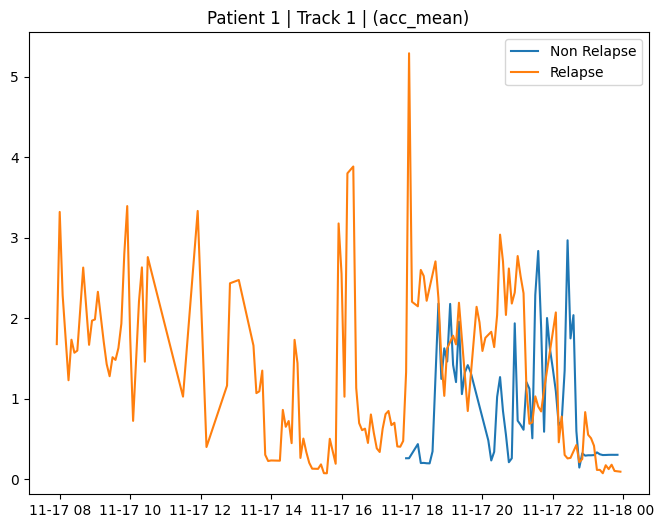

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['acc_mean'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['acc_mean'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (acc_mean)")

plt.legend()
plt.show()

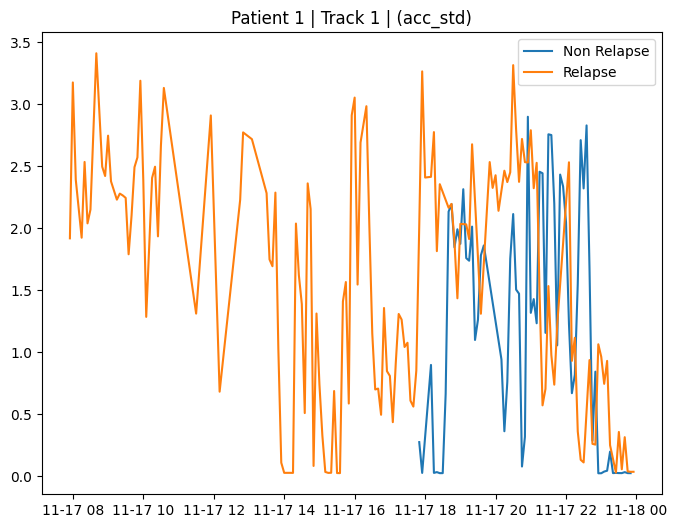

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['acc_std'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['acc_std'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (acc_std)")

plt.legend()
plt.show()

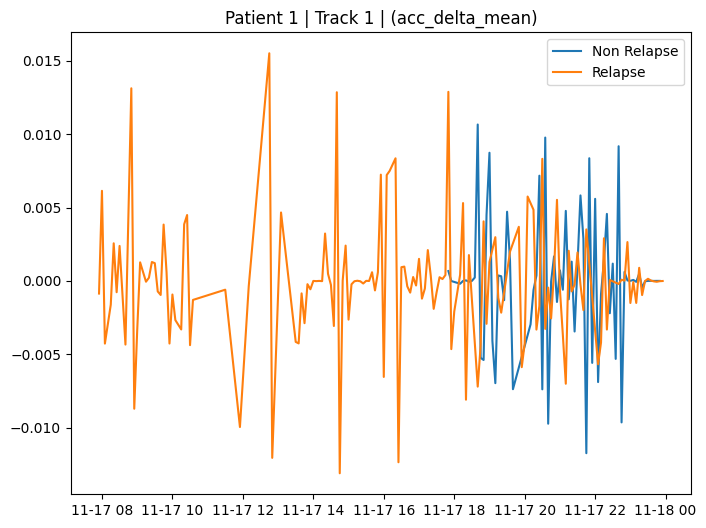

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['acc_delta_mean'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['acc_delta_mean'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (acc_delta_mean)")

plt.legend()
plt.show()

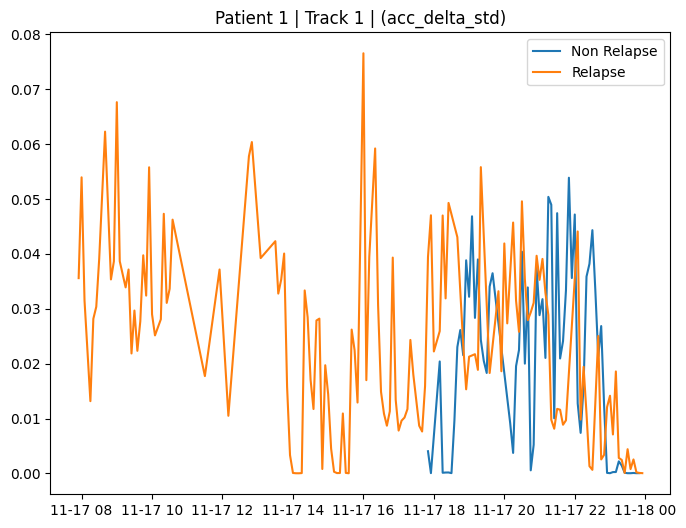

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['acc_delta_std'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['acc_delta_std'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (acc_delta_std)")

plt.legend()
plt.show()

##### 3.3 Gyroscope

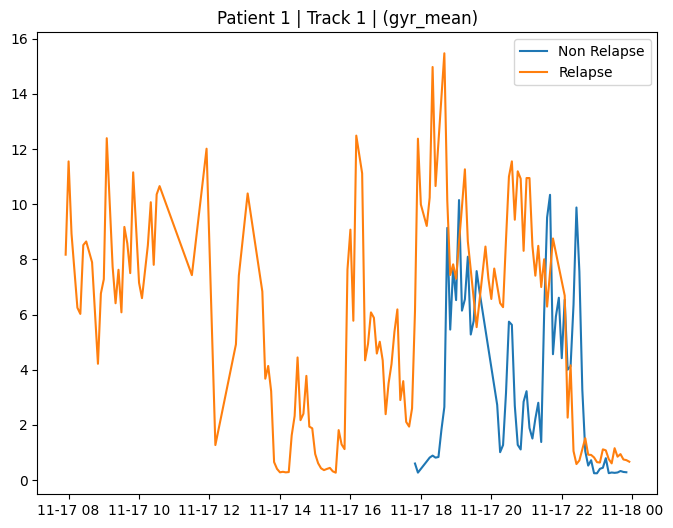

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['gyr_mean'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['gyr_mean'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (gyr_mean)")

plt.legend()
plt.show()

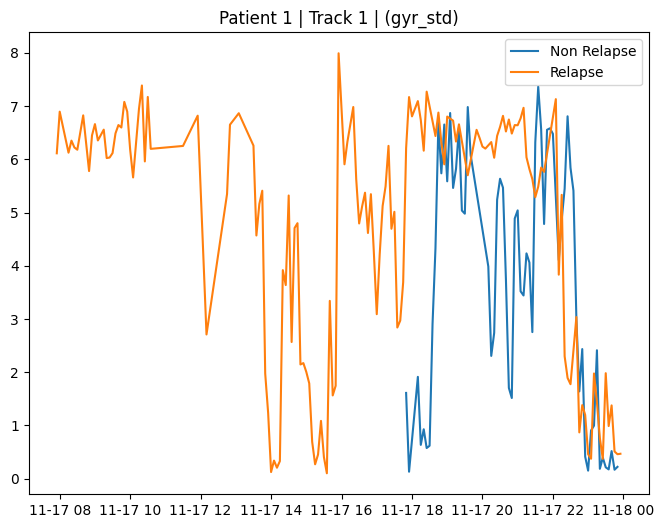

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['gyr_std'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['gyr_std'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (gyr_std)")

plt.legend()
plt.show()

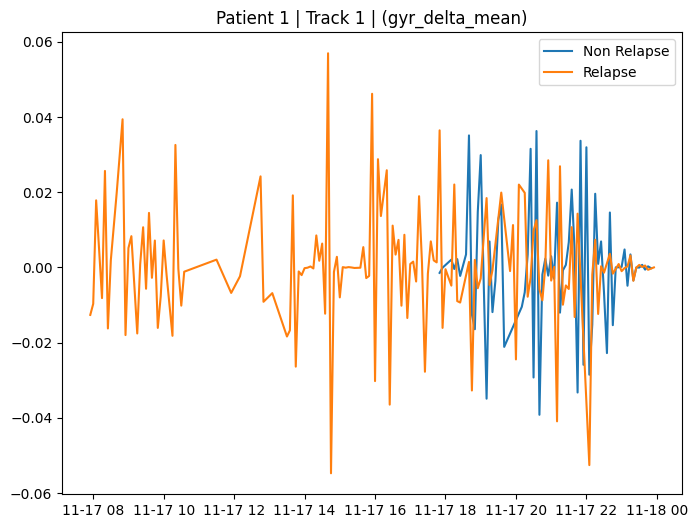

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['gyr_delta_mean'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['gyr_delta_mean'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (gyr_delta_mean)")

plt.legend()
plt.show()

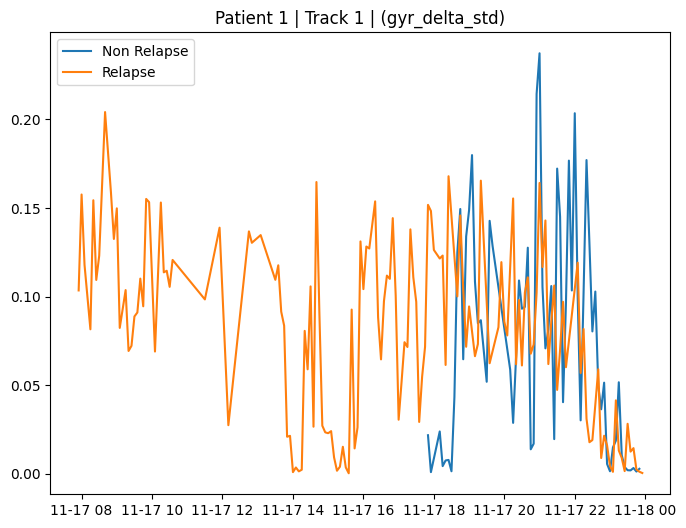

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(feat_day2['DateTime'], feat_day2['gyr_delta_std'], label='Non Relapse')
ax.plot(feat_relapses['DateTime'], feat_relapses['gyr_delta_std'], label='Relapse')

ax.set_title(f"Patient 1 | Track 1 | (gyr_delta_std)")

plt.legend()
plt.show()